In [22]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


In [8]:
data=pd.read_csv('college.csv')
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [9]:
data.tail

<bound method NDFrame.tail of      College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0       CLG0030  107             6.61  6.28                     8   
1       CLG0061   97             5.52  5.37                     8   
2       CLG0036  109             5.36  5.83                     9   
3       CLG0055  122             5.47  5.75                     6   
4       CLG0004   96             7.91  7.69                     7   
...         ...  ...              ...   ...                   ...   
9995    CLG0021  119             8.41  8.29                     4   
9996    CLG0098   70             9.25  9.34                     7   
9997    CLG0066   89             6.08  6.25                     3   
9998    CLG0045  107             8.77  8.92                     3   
9999    CLG0060  109             9.41  9.77                     8   

     Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                       No                       8               

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

# Encode 'Placement' (Target variable)
data['Placement'] = label_enc.fit_transform(data['Placement'])

# Encode 'Internship_Experience' (Feature)
data['Internship_Experience'] = label_enc.fit_transform(data['Internship_Experience'])


In [13]:
X = data.drop(columns=['College_ID', 'Placement'])  # Features
y = data['Placement']                               # Target


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred = rf.predict(X_test)


In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
 [[1674    0]
 [   0  326]]


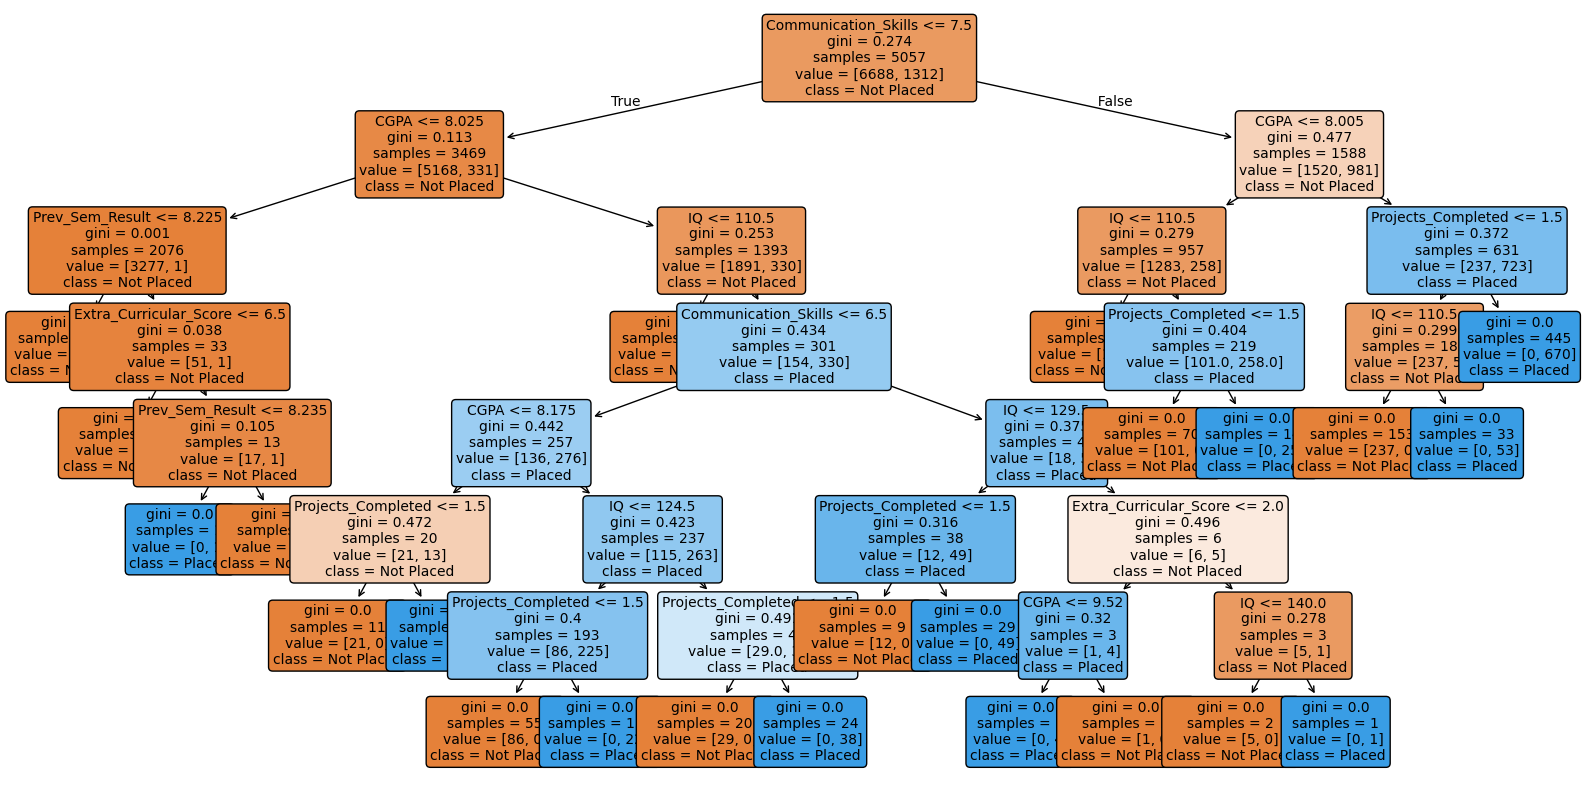

In [24]:
from sklearn.tree import plot_tree

# Pick one tree from the forest (e.g., the first one)
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], 
          feature_names=X.columns, 
          class_names=['Not Placed', 'Placed'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()


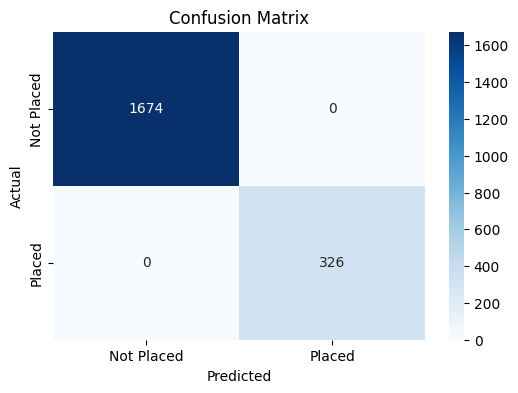

In [25]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Placed', 'Placed'],
            yticklabels=['Not Placed', 'Placed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
